## Purpose: Fixed parameters in fitting

Learn the difference between the 3 options.

Demonstration: 
    1. Parameter fit with fixed parameters
    2. Fitter with fixed parameters
    3. Model with fixed parameters

Author: Do Kester


import classes

In [1]:
import numpy as numpy
import math

from BayesicFitting import PolynomialModel
from BayesicFitting import Fitter
from BayesicFitting import formatter as fmt
from BayesicFitting import plotFit
import matplotlib.pyplot as plt

define some constants

In [2]:
N = 21
sig = 0.1

make a 3-degree polynomial

In [3]:
x = numpy.linspace( -2.0, 3.0, N, dtype=float )
ym = 1.2 + 0.5 * x + 0.33 * x * x + 0.27 * x * x * x

y = ym + sig * numpy.random.randn( N )


Define the fitter: Fitter.<br>
First run the fit without any kept parameters; then with p_1 = 1.8. Note the larger stdevs.

par0   [    1.204    0.491    0.327    0.274] 
stdv   [    0.031    0.028    0.014    0.007]
par1   [    0.838    1.800    0.594    0.002] 
stdv   [    0.318    0.294    0.146    0.073]


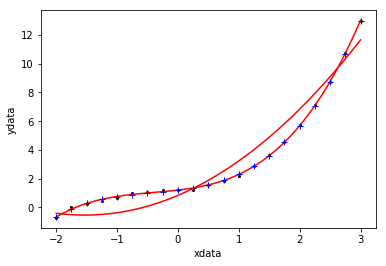

In [4]:
poly = PolynomialModel( 3 )
fitter = Fitter( x, poly )
par0 = fitter.fit( y )
stdv0 = fitter.stdevs
print( "par0  ", fmt( par0 ), "\nstdv  ", fmt( stdv0 ) )
plotFit( x, y, model=poly, show=False )
# plot the "thruth" as blue crosses
plt.plot( x, ym, 'b+' )
par1 = fitter.fit( y, keep={1:1.8} )
stdv1 = fitter.stdevs
print( "par1  ", fmt( par1 ), "\nstdv  ", fmt( stdv1 ) )
plotFit( x, model=poly )


Now set p_1 = 1.8, in the fitter itself. The fitter will know that it is excluded, when fitting but also for the stdevs. It returns 0.0 for all parameters that are kept.

par0   [    0.838    1.800    0.594    0.002] 
stdv   [    0.324    0.000    0.140    0.042]


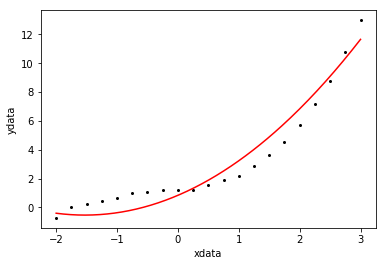

In [5]:
poly = PolynomialModel( 3 )
fitter = Fitter( x, poly, keep={1:1.8} )
par0 = fitter.fit( y )
stdv0 = fitter.stdevs
print( "par0  ", fmt( par0 ), "\nstdv  ", fmt( stdv0 ) )
plotFit( x, y, model=poly )



Now fix a parameter directly in the model. The effect is that the parameter disappears from the parameter list.

par0   [    0.838    0.594    0.002] 
stdv   [    0.324    0.140    0.042]


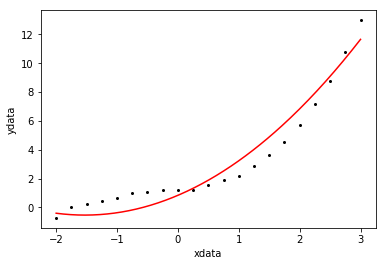

In [6]:
poly = PolynomialModel( 3, fixed={1:1.8} )
fitter = Fitter( x, poly )
par0 = fitter.fit( y )
stdv0 = fitter.stdevs
print( "par0  ", fmt( par0 ), "\nstdv  ", fmt( stdv0 ) )
plotFit( x, y, model=poly )
